### Parte I: Análisis de la base de hogares y tipo de ocupación

#### 2-Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base. Esto es, a la base de la encuesta individual de cada año (que usaron en el TP3) unan la base de la encuesta de hogar. Asegúrese de estar usando las variables CODUSU y NRO_Hogar para el merge

In [ ]:
#Importamos Variables de Interes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Leemos los archivos
EPH2024H = pd.read_excel('usu_hogar_T124.xlsx')
EPH2004H = pd.read_stata("Hogar_t104.dta")

EPH_completo_I = pd.read_csv('respondieron_limpio.csv')


C:\Users\gabri\AppData\Local\Temp\ipykernel_15752\1765245510.py:4: DtypeWarning: Columns (2,15,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  EPH_completo_I = pd.read_csv('respondieron_limpio.csv')


In [ ]:
#Seleccionamos las variables de interes utilziadas en el trabajo anterior
var_interes = ["codusu", "estado", "nro_hogar","desocupado",'ch04','ch06',"pareja_actual","cobertura_m","ch09","ch15", 'nivel_ed_or', 'ipcf']
EPH_completo_I = EPH_completo_I[["codusu", "estado", "nro_hogar","desocupado",'ch04','ch06',"pareja_actual","cobertura_m","ch09","ch15", 'nivel_ed_or', 'ipcf']]

In [5]:
EPH_completo_I

,codusu,estado,nro_hogar,desocupado,ch04,ch06,pareja_actual,cobertura_m,ch09,ch15,nivel_ed_or,ipcf
0,125098,3,1.0,0,1,79.0,0,1,1,1,3,206299.21760
1,125397,1,1.0,0,2,67.0,0,0,1,2,2,0.00000
2,125515,3,1.0,0,2,74.0,0,1,1,1,2,246662.10800
3,125558,1,1.0,0,1,54.0,1,1,1,1,2,298517.21025
4,125558,3,1.0,0,2,51.0,1,1,1,1,6,298517.21025
...,...,...,...,...,...,...,...,...,...,...,...,...
13004,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,1,21.0,0,1,1,1,5,0.00000
13005,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,1,19.0,0,1,1,1,5,0.00000
13006,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,2,16.0,0,1,1,1,3,0.00000
13007,TQRMNOPSYHJLOQCDEIIAD00794774,1,1.0,0,2,34.0,0,1,1,1,5,910000.00000


In [ ]:
#Especificamos que datos queremos de las vases
EPH2004H.columns = EPH2004H.columns.str.lower()
EPH2024H.columns = EPH2024H.columns.str.lower()

EPH2024BSH=EPH2024H[(EPH2024H["aglomerado"] == 32) | (EPH2024H["aglomerado"] == 33)]
EPH2004BSH=EPH2004H[(EPH2004H["aglomerado"] == "Ciudad de Buenos Aires") | (EPH2004H["aglomerado"] == "Partidos del GBA")]

In [ ]:
#Concatenamos
EPH_completo_H= pd.concat([EPH2004BSH, EPH2024BSH], ignore_index=True)
EPH_completo_H

,codusu,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph,pondih
0,125098,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,Departamento,...,,04,1.0,0.0,98.0,0.0,0.0,0.0,00000,NaN
1,125397,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,Departamento,...,,00,1.0,0.0,98.0,0.0,0.0,0.0,00000,NaN
2,125515,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,Departamento,...,,05,1.0,0.0,98.0,0.0,0.0,0.0,00010,NaN
3,125558,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,Departamento,...,,06,2.0,0.0,3.0,4.0,0.0,0.0,00000,NaN
4,125599,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1471.0,Casa,...,,02,2.0,0.0,1.0,0.0,0.0,0.0,00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,TQRMNOPSSHKMROCDEIJAH00861731,1.0,1,2024.0,1,1,S,33,3772.0,1,...,NaN,10,1,0,96,0,0,0,NaN,5211.0
4892,TQRMNOPWVHJLSSCDEIJAH00794914,1.0,1,2024.0,1,1,S,33,1862.0,1,...,NaN,2,4,2,98,0,0,0,NaN,4520.0
4893,TQRMNOQQWHKMOQCDEIJAH00861732,1.0,1,2024.0,1,1,S,33,2639.0,1,...,NaN,12,2,0,98,0,0,0,NaN,0.0
4894,TQRMNOSXRHKMNMCDEIJAH00861733,1.0,1,2024.0,1,1,S,33,1497.0,2,...,NaN,10,1,0,98,0,0,0,NaN,2000.0


In [ ]:
# Busco las columnas repetidas en las bases de datos
columnas_I = set(EPH_completo_I.columns)
columnas_H = set(EPH_completo_H.columns)
columnas_merge = set(["codusu", "nro_hogar"]) #mergeamos las dos columnas 

# Encontrar las columnas que comparten
columnas_comunes = columnas_I.intersection(columnas_H)

# Mostrar las columnas que comparten
print("Columnas comunes en ambas bases:")
print(columnas_comunes)

columnas_interes = columnas_comunes - columnas_merge
columnas_interes = sorted(list(columnas_interes))

Columnas comunes en ambos DataFrames:
{'codusu', 'ipcf', 'nro_hogar'}


In [ ]:
#Hago un merge de los dataframes y diferencio los valores con los sujijos _I y _H
EPH_completo = pd.merge(EPH_completo_I, EPH_completo_H, on=["codusu", "nro_hogar"], suffixes=('_I', '_H'))


In [10]:
EPH_completo

,codusu,estado,nro_hogar,desocupado,ch04,ch06,pareja_actual,cobertura_m,ch09,ch15,...,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph,pondih
0,125098,3,1.0,0,1,79.0,0,1,1,1,...,,04,1.0,0.0,98.0,0.0,0.0,0.0,00000,NaN
1,125397,1,1.0,0,2,67.0,0,0,1,2,...,,00,1.0,0.0,98.0,0.0,0.0,0.0,00000,NaN
2,125515,3,1.0,0,2,74.0,0,1,1,1,...,,05,1.0,0.0,98.0,0.0,0.0,0.0,00010,NaN
3,125558,1,1.0,0,1,54.0,1,1,1,1,...,,06,2.0,0.0,3.0,4.0,0.0,0.0,00000,NaN
4,125558,3,1.0,0,2,51.0,1,1,1,1,...,,06,2.0,0.0,3.0,4.0,0.0,0.0,00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13004,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,1,21.0,0,1,1,1,...,NaN,12,2,1,98,0,0,0,NaN,0.0
13005,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,1,19.0,0,1,1,1,...,NaN,12,2,1,98,0,0,0,NaN,0.0
13006,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,2,16.0,0,1,1,1,...,NaN,12,2,1,98,0,0,0,NaN,0.0
13007,TQRMNOPSYHJLOQCDEIIAD00794774,1,1.0,0,2,34.0,0,1,1,1,...,NaN,10,1,0,96,0,0,0,NaN,1781.0


#### 3-Limpien la base de datos tomando criterios que hagan sentido. Explicar cualquier decisión como el tratamiento de valores faltantes (missing values), extremos (outliers), o variables categóricas. Justifique sus decisiones

In [11]:
#Missing values
#Aca nos fijamos cuantos valores hay con no NaN
print(EPH_completo_H.info())
print('Dimensión de la base:', EPH_completo.shape, '\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 89 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codusu      4896 non-null   object 
 1   nro_hogar   4896 non-null   float64
 2   realizada   4896 non-null   object 
 3   ano4        4896 non-null   float64
 4   trimestre   4896 non-null   object 
 5   region      4896 non-null   object 
 6   mas_500     4896 non-null   object 
 7   aglomerado  4896 non-null   object 
 8   pondera     4896 non-null   float64
 9   iv1         4896 non-null   object 
 10  iv1_esp     2355 non-null   object 
 11  iv2         4896 non-null   object 
 12  iv3         4896 non-null   object 
 13  iv3_esp     2353 non-null   object 
 14  iv4         4896 non-null   object 
 15  iv5         4896 non-null   object 
 16  iv6         4896 non-null   object 
 17  iv7         4896 non-null   object 
 18  iv7_esp     2356 non-null   object 
 19  iv8         4896 non-null  

In [12]:
#NaN 
#Vemos los NaN en cada columna
for i in EPH_completo.columns:
    if EPH_completo[i].isna().sum()>0:
        print("Columna con NaN:", i, EPH_completo[i].isna().sum())
        

Columna con NaN: iv1_esp 5634
Columna con NaN: iv3_esp 5641
Columna con NaN: iv7_esp 5618
Columna con NaN: ii7_esp 5627
Columna con NaN: ii8_esp 5479
Columna con NaN: ix_men10 3976
Columna con NaN: idecifr 5643
Columna con NaN: pdecifr 5643
Columna con NaN: ideccfr 5643
Columna con NaN: pdeccfr 5643
Columna con NaN: idimph 5643
Columna con NaN: pondih 7366


In [ ]:
EPH_completo["iv1_esp"].value_counts()
#Esta columna tiene 7350 valores NaN y 25 completados. No vale la pena agrupar, ni mantener la columna. --> No la tenemos en cuenta

iv1_esp
                                                 7350
casilla                                             8
VIV EN VILLA                                        7
VILLA                                               6
VIVIENDA EN LUGAR DE TRABAJO                        2
VIVIENDA EN UN DEPOSITO                             1
Casillo                                             1
Name: count, dtype: int64

In [ ]:
EPH_completo["iv3_esp"].value_counts() #Lo mismo que la anterior

iv3_esp
                                                 7361
FKEXIPLAS                                           5
NADA                                                1
parket                                              1
Name: count, dtype: int64

In [ ]:
EPH_completo["iv7_esp"].value_counts() #Lo mismo que la anterior

iv7_esp
                                                 7347
VECINO                                              7
carga los tachos                                    7
 LE DA UN VECINO                                    5
Camion de Agua                                      5
TANQUE COMUNITARIO                                  5
SE LO DA VECINO DE UNA BOMBA                        4
no tiene                                            4
no especifica                                       4
COMPRESOR                                           3
Name: count, dtype: int64

In [16]:
EPH_completo["ii7_esp"].value_counts() ##ii7 es suficiente, explica mas 

ii7_esp
                                                 7345
PRENDADO PAGAN CUOTAS                               5
PERTENECE ASUS PADRES QUE VIVEN EN PB.              5
EN SUCESION                                         4
bien de familia                                     4
es del papa de los hijos                            3
casa tomada                                         3
EN COMODATO                                         3
la vivienda esta a nombre de sus hijos y usuf       2
FAMILIAR DE SUS ABUELOS                             2
ES DUEñA DE LA MITAD                                1
CEDIDO A SUS HIJAS CON CLAUSULA DE USO HASTA        1
HERENCIA                                            1
LA EMP LE PAGA EL ALQUILER Y TODOS LOS GASTOS       1
no dice                                             1
no responde                                         1
Name: count, dtype: int64

In [ ]:
EPH_completo["ii8_esp"].value_counts() #Se observa que muchos tienen electricidad como su metodo de cocina --> Agregarlo más adelante

ii8_esp
                                                 7348
electricidad                                      101
electrico                                          15
NO TIENEN USAN EL DEL VECINO                       10
ELECTRICIDAD                                       10
ELECTRICO                                           7
Electricidad                                        6
Electrico                                           5
electrica                                           5
ELECTRICIDAD                                        3
cocina electrica                                    3
Cocina electrica                                    2
cocina en otra vivienda                             2
Electrica                                           2
COMPRA COMIDA HECHA                                 2
ELECTRICA                                           2
ELECTRICA                                           1
NO TIENE COCINA                                     1
NADA,COME ABAJO     

In [ ]:
EPH_completo["ix_men10"].value_counts() #es numerica
#Para ver de donde vienen los NaN
EPH_completo[EPH_completo["ano4"]==2004]["ix_men10"].value_counts()

#Se puede asumir que los NaN son 0 en 2004 porque no hay 0 en la columna (no le podemos preguntar a la persona). Es poco probable
# que haya personas sin hijos en la muestra de 2004.

EPH_completo["ix_men10"]=EPH_completo["ix_men10"].fillna(0) #llenamos de ceros a los NaN

In [19]:
print(EPH_completo["idecifr"].value_counts()) #no la usamos
print(EPH_completo["pdecifr"].value_counts()) #los aglomerados que usamos son >500.000, no se usa, la volamos
print(EPH_completo["ideccfr"].value_counts()) #no se usa
print(EPH_completo["pdeccfr"].value_counts()) #no se usa
print(EPH_completo["idimph"].value_counts()) #los NaN estan porque en 2024 no se pregunta. No lo usamos, bye
print(EPH_completo["pondih"].value_counts()) #no esta en 2004, pero si en 2024. No lo usamos

idecifr
    7366
Name: count, dtype: int64
pdecifr
    7366
Name: count, dtype: int64
ideccfr
    7366
Name: count, dtype: int64
pdeccfr
    7366
Name: count, dtype: int64
idimph
00000    5702
10000    1016
00010     226
00100     115
11000      94
10010      74
10100      64
01000      37
11100      16
10110       6
11010       6
00110       4
01100       3
01010       3
Name: count, dtype: int64
pondih
0.0        1638
8403.0       14
1861.0       13
2358.0       12
21006.0      11
           ... 
2662.0        1
1411.0        1
3829.0        1
2547.0        1
3977.0        1
Name: count, Length: 1416, dtype: int64


In [ ]:
#Outliers 
#Quiero ver las variables numericas, por eso uso EPH_completo_H
dt = EPH_completo_H.describe().T
print(dt.to_string())

             count           mean            std     min     25%     50%       75%          max
nro_hogar   4896.0       1.042279       1.021550     1.0     1.0     1.0       1.0        51.00
ano4        4896.0    2014.396242       9.993167  2004.0  2004.0  2024.0    2024.0      2024.00
pondera     4896.0    1878.282680     858.623786    42.0  1428.0  1673.0    2145.0      8685.00
ii3_1       4896.0       0.073529       0.273266     0.0     0.0     0.0       0.0         3.00
ii5_1       4896.0       0.007149       0.099795     0.0     0.0     0.0       0.0         2.00
ii6_1       4896.0       0.009804       0.108410     0.0     0.0     0.0       0.0         3.00
ix_tot      4896.0       3.002042       1.750294     1.0     2.0     3.0       4.0        15.00
ix_men10    3320.0       0.615361       0.886071     0.0     0.0     0.0       1.0         7.00
ix_mayeq10  4896.0       2.584763       1.391703     1.0     2.0     2.0       3.0        14.00
itf         4896.0  231093.796569  77527

In [ ]:

#nro_hogar,año y pondera estan ok, no nos importan para el modelo
#ii3_1 no nos importa para el modelo, es condicional
#ii5_1 no nos importa para el modelo, es condicional
#ii6_1 solo esta en 2004 (VEEER)
#ix_tot ver que el maximo es 15 y en el cuartil 0.75 el valor es 4 (ver si se saca o no y si se usa)
#ix_men10 capaz. Ver, no parece afectar tanto el max
# ix_mayeq10 capaz.Ver porque el max 14.
# itf ver de sacar el maximo porque es muy alto y tira el promedio para arriba
# ipcf idem arriba. USAMOS ESTE      
# pondih no importa, no lo usamos

<Axes: xlabel='ch06'>

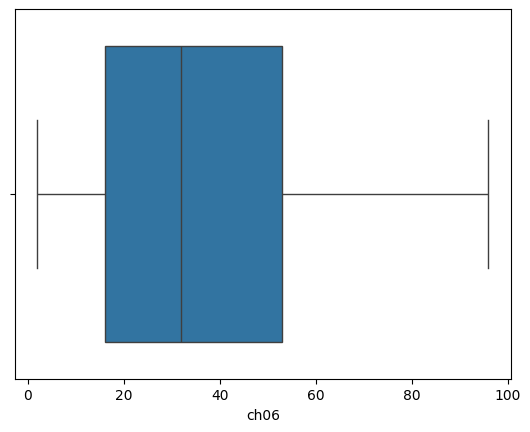

In [22]:
#Busquemos outliers en las variables que usamos anteriormente
#CH06
sns.boxplot(x=EPH_completo["ch06"]) 
#Esta ok, no hay outliers


<Axes: xlabel='ch15'>

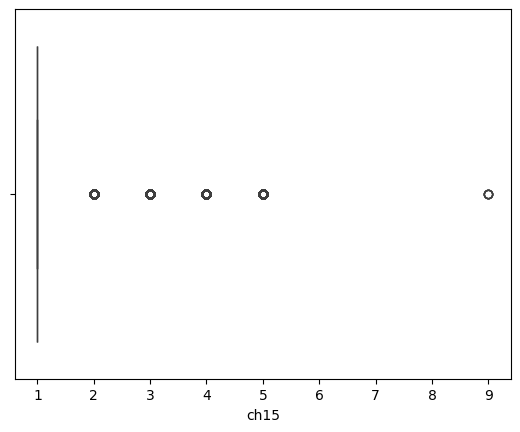

In [ ]:
sns.boxplot(x=EPH_completo["ch15"]) 
# Es categorica

<Axes: xlabel='ipcf_I'>

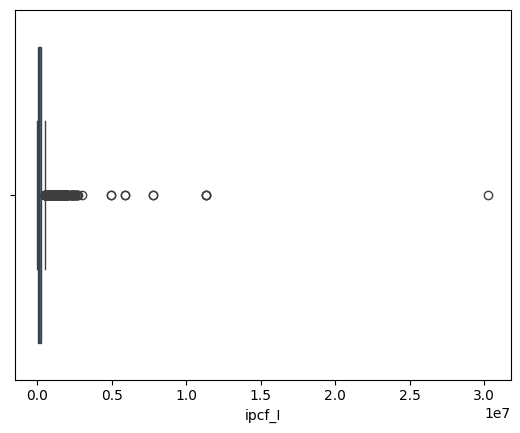

In [ ]:
sns.boxplot(x=EPH_completo["ipcf_I"]) 
#Muchos outliers, ver de eliminarlos 

1688


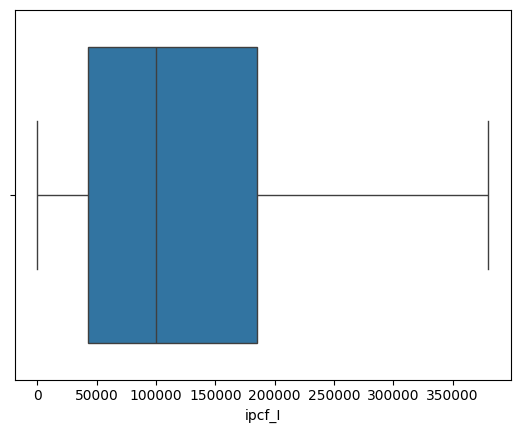

In [ ]:
#Eliminamos mediante MAD con la mediana de los Ingresos Per Capita familiar
mediana=EPH_completo["ipcf_I"].median()

EPH_completo["median"]=mediana

#Calculo el MAD
EPH_completo["Distancia Mediana"] = np.abs(EPH_completo["ipcf_I"] - EPH_completo["median"] ) 
mediana=EPH_completo["Distancia Mediana"].median()

EPH_completo["MAD"]=mediana

EPH_completo_limpio = EPH_completo[EPH_completo["ipcf_I"] <= EPH_completo["median"] + EPH_completo["MAD"] * 3]


EPH_completo_limpio= EPH_completo_limpio[EPH_completo_limpio["ipcf_I"] >= EPH_completo_limpio["median"] - EPH_completo_limpio["MAD"] * 3]

sns.boxplot(x=EPH_completo_limpio["ipcf_I"]) 

print(len(EPH_completo) - len(EPH_completo_limpio))

In [ ]:
#Descarto las anteriores
EPH_completo_limpio = EPH_completo_limpio.drop(["median", "MAD", "Distancia Mediana"], axis=1)

In [29]:
#Seleccion de variables HOGAR para ver cual usamos 
var_interes.remove("ipcf") 
var_interes = var_interes + ["iv1","iv2","iv3","iv4","iv6","iv8","iv11","iv12_1","iv12_2","iv12_3",
               "ii1","ii2","ii4_1","ii7","ii8","ii9","v1", "v2", "v3", "v5", "v7","v12"
               ,"v13","v14","v15","v16","v17", "ix_tot", "ix_men10","ix_mayeq10","ipcf_I","vii1_1","ano4"]
#Caracteristicas de la vivienda
#IV1 (tipo de vivienda por observacion entrevistador),
#IV2(# de ambientes), 
#IV3 (piso),  
#IV4 (TECHO), 
#IV6 (acceso a agua), 
#IV8 (baño, letrina), 
#IV11 (si tiene cloacas), 
#iv12_1 (cerca de basurales), 
#iv12_2 (zona inundable), 
#iv12_3 (villa de emergencia)

#Caracteristicas del hogar
#ii1 (preguntar, ambientes exclusivos para vivienda)
#ii2 (ambientes para dormir)
#ii4_1 (si tiene cocina)
#ii7 (regimen de tenencia)
#ii8 (combustible utilizado para cocinar) --> meter un valor y unificar electricidad
#ii9 (baño tenencia) veer si la dejamos

#Estrategias del hogar (chusmear despues por # de personas que viven en la casa y rango etario)
#v1 (vivir con ingresos del trabajo)
#v2 (ingresos jubilacion)
#v3 (indemnizacion por despido)
#v5 (subsidio social) 
#v7 (que te den mercaderia personas fuera del hogar) ver
#v12 (idem arriba pero con plata)
#v13 (de lo que tenia ahorrado)
#v14 (prestamos a familiares y amigos)
#v15 (prestamos con bancos)
#v16 (compras en cuotas)
#v17 (vender pertenencias)

#Resumen del hogar
#IX_tot (# de miembros del hogar)
#IX_men10 (idem <10)
#IX_mayeq10 (idem >10)
#IPCF (monto de ingreso per capita familiar)
#VII1_1 (si tiene empleada dosmetica)


785


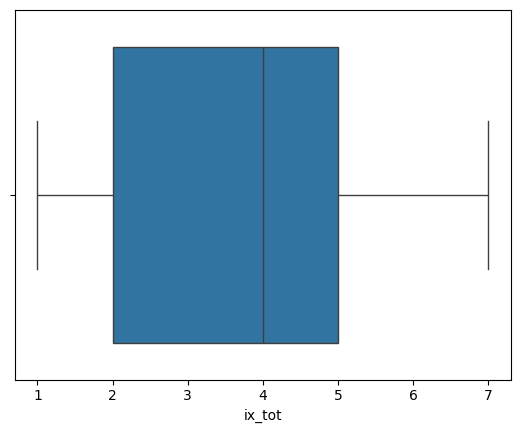

In [ ]:
#Eliminamos mediante MAD con la mediana de los meimbros totales de la familia

mediana=EPH_completo["ix_tot"].median()

EPH_completo["median"]=mediana

#Calculo el MAD
EPH_completo["Distancia Mediana"] = np.abs(EPH_completo["ix_tot"] - EPH_completo["median"] ) #Calculo la distancia absoluta a la mediana según el subgrupo
mediana=EPH_completo["Distancia Mediana"].median()

EPH_completo["MAD"]=mediana

EPH_completo_limpio = EPH_completo[EPH_completo["ix_tot"] <= EPH_completo["median"] + EPH_completo["MAD"] * 3]


EPH_completo_limpio= EPH_completo_limpio[EPH_completo_limpio["ix_tot"] >= EPH_completo_limpio["median"] - EPH_completo_limpio["MAD"] * 3]

sns.boxplot(x=EPH_completo_limpio["ix_tot"]) 

print(len(EPH_completo) - len(EPH_completo_limpio))

In [31]:
EPH_completo_limpio = EPH_completo_limpio.drop(["median", "MAD", "Distancia Mediana"], axis=1)

<Axes: xlabel='ix_mayeq10'>

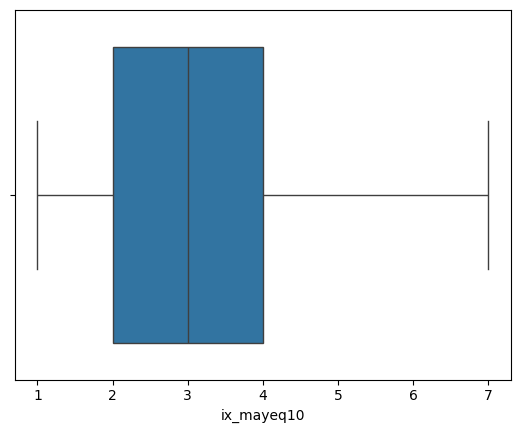

In [32]:
sns.boxplot(x=EPH_completo_limpio["ix_mayeq10"]) 

<Axes: xlabel='ix_men10'>

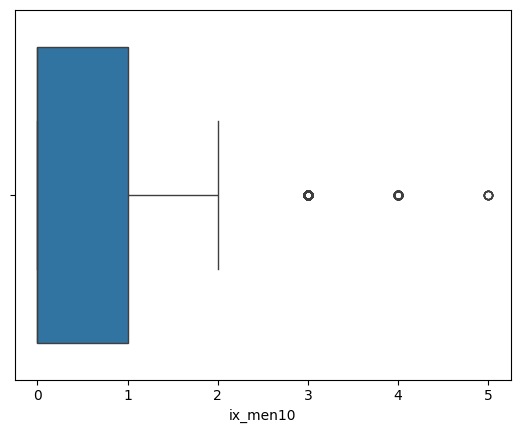

In [ ]:
sns.boxplot(x=EPH_completo_limpio["ix_men10"]) #Algunos con muchos niñes, pero no muy relevante. 

#### Mapeo

In [34]:
#Caracteristicas de la vivienda
#IV2(# de ambientes),  --> Tiene un 99 ??


mapeo_IV1 = {
    'Casa': 1,
    'Departamento': 2,
    'Pieza de inquilinato': 3,
    'Pieza en hotel/pensión': 4,
    'local no construido para habitación': 5,
    'Otro':6
}

mapeo_IV3 = {
    'Mosaico/baldosa/madera/cerámica/alfombra': 1,
    'Cemento/ladrillo fijo': 2,
    'Ladrillo suelto/tierra': 3,
    'Otro': 4,
}

mapeo_IV4 = {
    'Membrana/cubierta asfáltica': 1,
    'Baldosa/losa sin cubierta': 2,
    'Pizarra/teja': 3,
    'Chapa de metal sin cubierta': 4,
    'Chapa de fibrocemento/plástico': 5,
    'Chapa de cartón':6,
    'N/S. Depto. de propiedad horizontal':9,
}

mapeo_IV6 = {
    'Por cañería dentro de la vivienda': 1,
    'Fuera de la vivienda pero dentro del terreno': 2,
    'Fuera del terreno': 3,
}

mapeo_IV11 = {
    'A red pública (cloaca)': 1,
    'A cámara séptica y pozo ciego': 2,
    'Sólo a pozo ciego': 3,
    'A hoyo/excavación en la tierra': 4,
    'Ns/Nr':9,
}

mapeo_SN = {
    'Sí': 1,
    'No': 2,
    'Ns./Nr.':9
}

#Caracteristicas del hogar
#ii1 (preguntar, ambientes exclusivos para vivienda) --> Algunos con más de 10
#ii7 (regimen de tenencia) --> Hay una que dice en relacion de dependencia
#ii9 (baño tenencia) veer si la dejamos
mapeo_II7 = {
    'Propietario de la vivienda y el terreno': 1,
    'Propietario de la vivienda solamente': 2,
    'Inquilino/arrendatario de la vivienda': 3,
    'Ocupante por pago de impuestos/expensas': 4,
    'Ocupante en relación de dependencia': 5,
    'Ocupante gratuito (con permiso)':6,
    'Ocupante de hecho (sin permiso)':7,
    'Está en sucesión': 8,
    'Otra situación': 9
}

mapeo_II8 = {
    'Gas de red': 1,
    'Gas de tubo/garrafa': 2,
    'Kerosene/leña/carbón': 3,
    'Otro': 4
}

mapeo_II9 = {
    'Uso exclusivo del hogar': 1,
    'Compartido con otro/s hogar/es de la misma vivienda': 2,
    'Compartido con otra/s vivienda/s': 3,
    'No tiene baño': 4
}


In [35]:
EPH_completo_limpio['iv1'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV1.get(row['iv1'], row['iv1']) 
    if row['ano4'] == 2004 else row['iv1'], axis=1)
EPH_completo_limpio['iv3'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV3.get(row['iv3'], row['iv3']) 
    if row['ano4'] == 2004 else row['iv3'], axis=1)
EPH_completo_limpio['iv4'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV4.get(row['iv4'], row['iv4']) 
    if row['ano4'] == 2004 else row['iv4'], axis=1)
EPH_completo_limpio['iv6'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV6.get(row['iv6'], row['iv6']) 
    if row['ano4'] == 2004 else row['iv6'], axis=1)
EPH_completo_limpio['iv8'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['iv8'], row['iv8']) 
    if row['ano4'] == 2004 else row['iv8'], axis=1)
EPH_completo_limpio['iv11'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV11.get(row['iv11'], row['iv11']) 
    if row['ano4'] == 2004 else row['iv11'], axis=1)
EPH_completo_limpio['iv12_1'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['iv12_1'], row['iv12_1']) 
    if row['ano4'] == 2004 else row['iv12_1'], axis=1)
EPH_completo_limpio['iv12_2'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['iv12_2'], row['iv12_2']) 
    if row['ano4'] == 2004 else row['iv12_2'], axis=1)
EPH_completo_limpio['iv12_3'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['iv12_3'], row['iv12_3']) 
    if row['ano4'] == 2004 else row['iv12_3'], axis=1)
EPH_completo_limpio['ii4_1'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['ii4_1'], row['ii4_1']) 
    if row['ano4'] == 2004 else row['ii4_1'], axis=1)
EPH_completo_limpio['ii7'] = EPH_completo_limpio.apply(
    lambda row: mapeo_II7.get(row['ii7'], row['ii7']) 
    if row['ano4'] == 2004 else row['ii7'], axis=1)
EPH_completo_limpio['ii8'] = EPH_completo_limpio.apply(
    lambda row: mapeo_II8.get(row['ii8'], row['ii8']) 
    if row['ano4'] == 2004 else row['ii8'], axis=1)
EPH_completo_limpio['ii9'] = EPH_completo_limpio.apply(
    lambda row: mapeo_II9.get(row['ii9'], row['ii9']) 
    if row['ano4'] == 2004 else row['ii9'], axis=1)
EPH_completo_limpio['ii9'] = EPH_completo_limpio.apply(
    lambda row: mapeo_II9.get(row['ii9'], row['ii9']) 
    if row['ano4'] == 2004 else row['ii9'], axis=1)

for i in range(1,19):
    columna = "v" + str(i)
    EPH_completo_limpio[columna] = EPH_completo_limpio.apply(
        lambda row: mapeo_SN.get(row[columna], row[columna]) 
        if row['ano4'] == 2004 else row[columna], axis=1)

In [36]:
#Añadimos la opcion de cocina electrica a II8:
EPH_completo_limpio['ii8'] = EPH_completo_limpio.apply(
    lambda row: 5 if 'elec' in str(row['ii8_esp']).lower()
    else row['ii8'], axis=1)

In [37]:
EPH_completo_limpio["ii1"]

0        3.0
1        2.0
2        2.0
3        4.0
4        4.0
        ... 
13004      5
13005      5
13006      5
13007      4
13008      2
Name: ii1, Length: 12224, dtype: object

In [38]:
EPH_completo_limpio2 = EPH_completo_limpio[var_interes]

In [39]:
EPH_completo_limpio2

,codusu,estado,nro_hogar,desocupado,ch04,ch06,pareja_actual,cobertura_m,ch09,ch15,...,v14,v15,v16,v17,ix_tot,ix_men10,ix_mayeq10,ipcf_I,vii1_1,ano4
0,125098,3,1.0,0,1,79.0,0,1,1,1,...,2,2,2,2,1.0,0.0,1.0,206299.21760,1.0,2004.0
1,125397,1,1.0,0,2,67.0,0,0,1,2,...,2,2,2,2,1.0,0.0,1.0,0.00000,1.0,2004.0
2,125515,3,1.0,0,2,74.0,0,1,1,1,...,2,2,2,2,1.0,0.0,1.0,246662.10800,1.0,2004.0
3,125558,1,1.0,0,1,54.0,1,1,1,1,...,1,2,2,2,4.0,0.0,4.0,298517.21025,2.0,2004.0
4,125558,3,1.0,0,2,51.0,1,1,1,1,...,1,2,2,2,4.0,0.0,4.0,298517.21025,2.0,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13004,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,1,21.0,0,1,1,1,...,2,1,1,2,6.0,0.0,6.0,0.00000,2,2024.0
13005,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,1,19.0,0,1,1,1,...,2,1,1,2,6.0,0.0,6.0,0.00000,2,2024.0
13006,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,2,16.0,0,1,1,1,...,2,1,1,2,6.0,0.0,6.0,0.00000,2,2024.0
13007,TQRMNOPSYHJLOQCDEIIAD00794774,1,1.0,0,2,34.0,0,1,1,1,...,1,2,1,2,1.0,0.0,1.0,910000.00000,1,2024.0


In [40]:
#Variables categoricas
# Notamos que origin es una variable categórica (toma valores 1, 2, 3)

# Usaremos one-hot encoding para transformar la columna categórica llamada origin 
# en varias columnas binarias (dummies).
# Cómo? get_dummies 

variables_cat= ["iv1","iv3","iv4","iv6","iv8","iv11","iv12_1","iv12_2","iv12_3","ii4_1","ii7","ii8","ii9",
                "v1", "v2", "v3", "v5", "v7","v12","v13","v14","v15","v16","v17", "ch04", "ch09", "ch15",
                "pareja_actual", "cobertura_m", "nivel_ed_or"]

EPH_dummies = pd.get_dummies(EPH_completo_limpio2, columns=variables_cat)

# Concatenamos con el df original
#EPH_dummies = pd.concat([EPH_completo_limpio, dummies], axis=1)
#auto_d.head()
#cuando tenemos una categorica en r no tenes que decir nada (ajusta n-1 parametros --> genera 3 columnas con dummies (001))

In [41]:
EPH_dummies

#EPH_completo_limpio["ii1"]

,codusu,estado,nro_hogar,desocupado,ch06,iv2,ii1,ii2,ix_tot,ix_men10,...,pareja_actual_1,cobertura_m_0,cobertura_m_1,nivel_ed_or_0,nivel_ed_or_1,nivel_ed_or_2,nivel_ed_or_3,nivel_ed_or_4,nivel_ed_or_5,nivel_ed_or_6
0,125098,3,1.0,0,79.0,3.0,3.0,1.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,False
1,125397,1,1.0,0,67.0,2.0,2.0,1.0,1.0,0.0,...,False,True,False,False,False,True,False,False,False,False
2,125515,3,1.0,0,74.0,2.0,2.0,1.0,1.0,0.0,...,False,False,True,False,False,True,False,False,False,False
3,125558,1,1.0,0,54.0,4.0,4.0,3.0,4.0,0.0,...,True,False,True,False,False,True,False,False,False,False
4,125558,3,1.0,0,51.0,4.0,4.0,3.0,4.0,0.0,...,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13004,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,21.0,5,5,4,6.0,0.0,...,False,False,True,False,False,False,False,False,True,False
13005,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,19.0,5,5,4,6.0,0.0,...,False,False,True,False,False,False,False,False,True,False
13006,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,16.0,5,5,4,6.0,0.0,...,False,False,True,False,False,False,True,False,False,False
13007,TQRMNOPSYHJLOQCDEIIAD00794774,1,1.0,0,34.0,4,4,1,1.0,0.0,...,False,False,True,False,False,False,False,False,True,False


#### 4-Construya variables (mínimo 3) que no estén en la base pero que sean relevantes para predecir individuos desocupados (por ejemplo, la proporción de personas que trabajan en el hogar).

In [ ]:
#Primera Variable: Cantidad de personas por cada habitacion de uso exclusivo 
# de habitaciones / # de personas en el hogar
EPH_dummies['HpP'] = EPH_dummies.apply(
    lambda row: row['ix_tot'] / row['ii1'] if row['ii1'] > 0 else 0, axis=1
)                                                            #Toma 0 en caso de que no tengan habitaciones de uso exclusivo


#Segunda Variable: Proporcion de personas que trabajan en el hogar

# Filtramos las personas que trabajan (estado == 1)
trabajadores = EPH_dummies[EPH_dummies['estado'] == 1]

# Agrupamos por 'codusu' y 'nro_hogar' y contar la cantidad de personas que trabajan en cada combinación
trabajadores_hogar = trabajadores.groupby(['codusu', 'nro_hogar'])['estado'].count()

EPH_dummies = EPH_dummies.merge(trabajadores_hogar, on=['codusu', 'nro_hogar'], how='left', suffixes=('', '_trabajadores'))

# Si hay combinaciones sin trabajadores (NaN), reemplazamos con 0
EPH_dummies['estado_trabajadores'].fillna(0, inplace=True)
EPH_dummies.rename(columns={'estado_trabajadores': 'trabajadores_hogar'}, inplace=True)


#Tercera Variable: Cantidad de dinero familiar entre cantidad de niños

EPH_dummies['ipcf_niño'] = EPH_dummies.apply(
    lambda row: row['ipcf_I'] / row['ix_men10'] if row['ix_men10'] > 0 else 0, axis=1
)

C:\Users\gabri\AppData\Local\Temp\ipykernel_15752\2821333635.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  EPH_dummies['estado_trabajadores'].fillna(0, inplace=True)


#### 5-Presenten estadísticas descriptivas de tres variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir la desocupación. Comenten las estadísticas obtenidas.

Estadísticas descriptivas de las variables seleccionadas:
                iv1           ii7           v13           v14           v15  \
count  12224.000000  12224.000000  12224.000000  12224.000000  12224.000000   
mean       1.340805      1.926047      1.728240      1.869355      1.931037   
std        0.553614      1.621290      0.493698      0.381650      0.310295   
min        1.000000      0.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      1.000000      2.000000      2.000000   
50%        1.000000      1.000000      2.000000      2.000000      2.000000   
75%        2.000000      3.000000      2.000000      2.000000      2.000000   
max        6.000000      9.000000      9.000000      9.000000      9.000000   

                v17  
count  12224.000000  
mean       1.916721  
std        0.329272  
min        1.000000  
25%        2.000000  
50%        2.000000  
75%        2.000000  
max        9.000000  

Frecuencia de los tipos de vivi

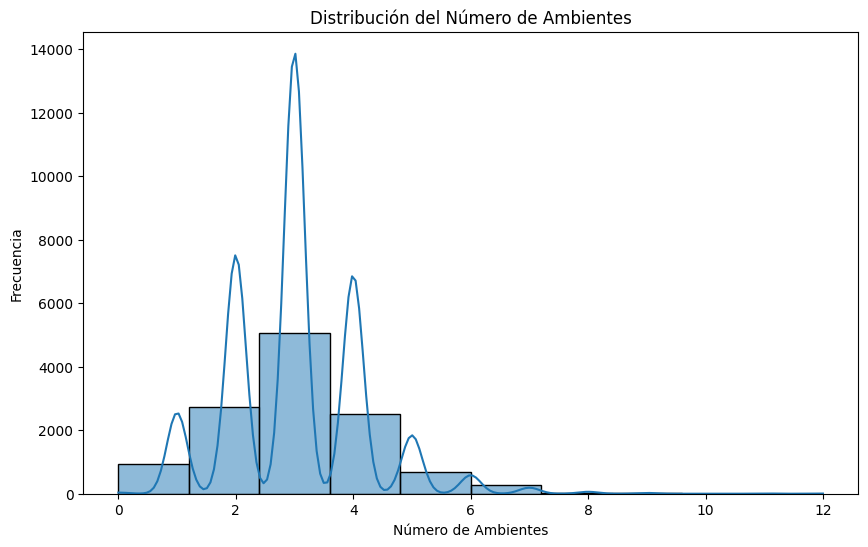

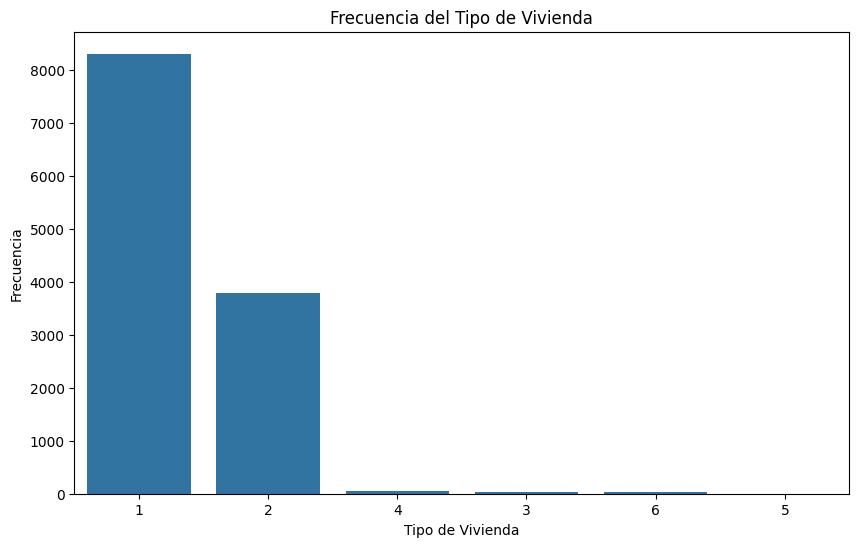

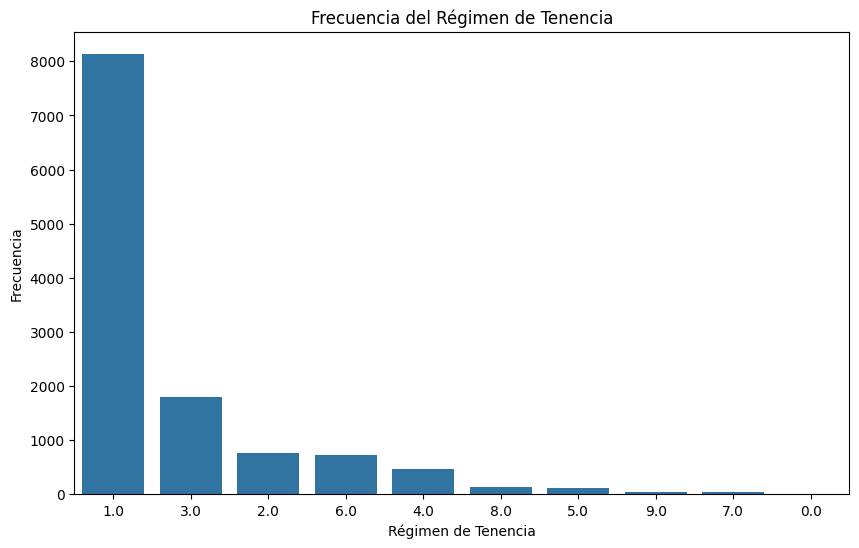

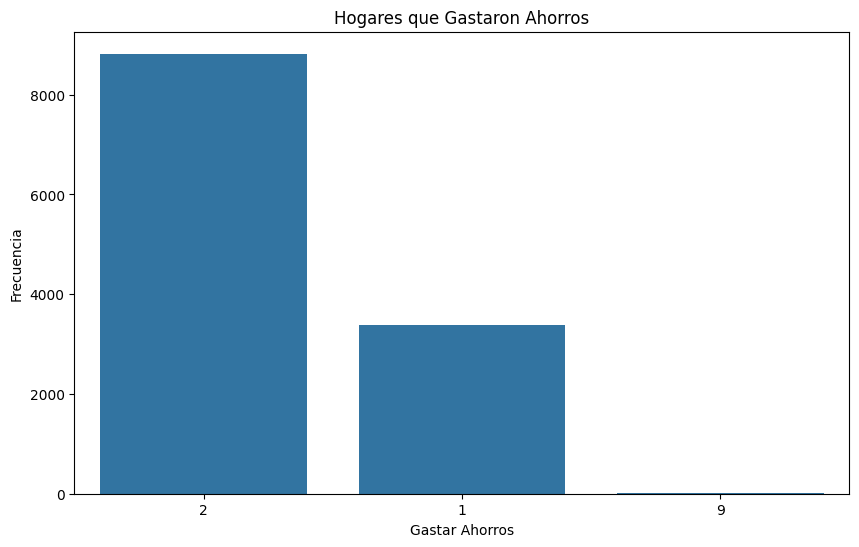

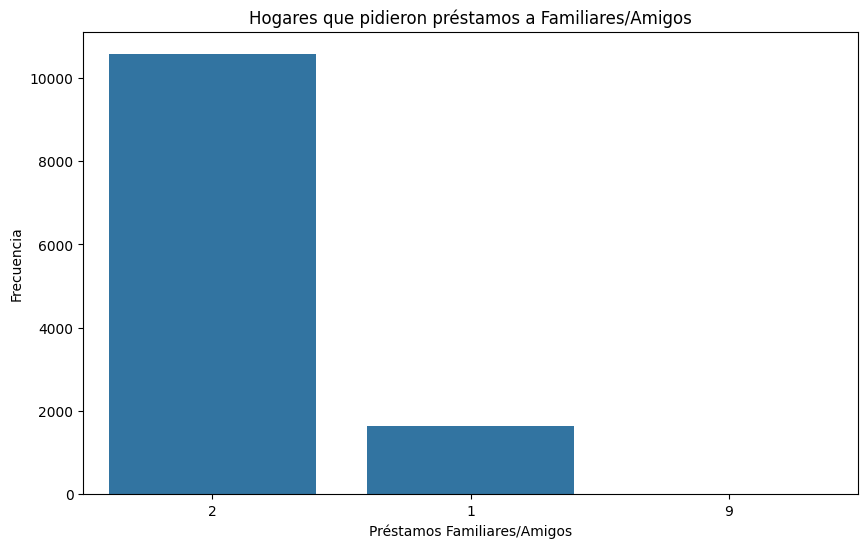

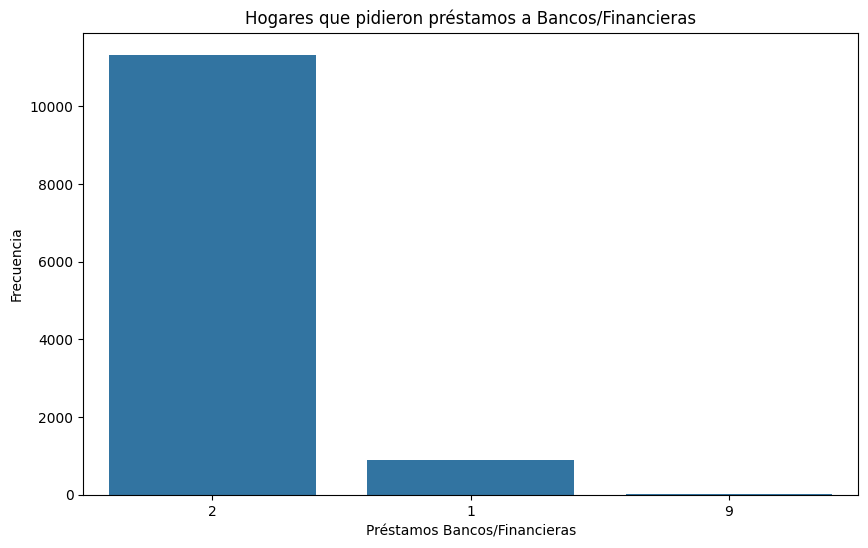

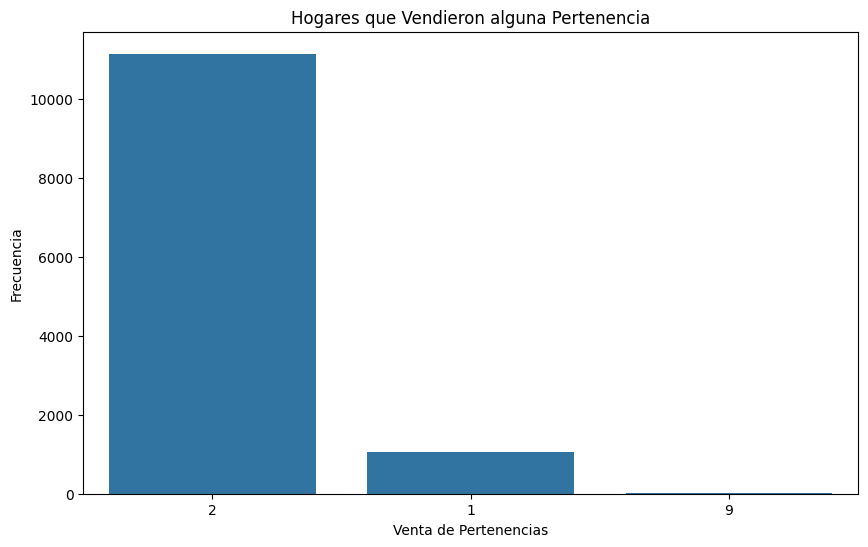

In [43]:
# Selección de variables de interés para el análisis descriptivo, incluyendo nuevas variables relevantes
variables_relevantes = ['iv1', 'ii7', 'ii1', 'v13', 'v14', 'v15', 'v17']

# Estadísticas descriptivas para las variables seleccionadas
estadisticas = EPH_completo_limpio2[variables_relevantes].describe()

# Mostrar las estadísticas descriptivas
print("Estadísticas descriptivas de las variables seleccionadas:")
print(estadisticas)

# Análisis adicional: frecuencias de variables categóricas y exploración visual
print("\nFrecuencia de los tipos de vivienda (IV1):")
print(EPH_completo_limpio2['iv1'].value_counts())

print("\nFrecuencia del régimen de tenencia (II7):")
print(EPH_completo_limpio2['ii7'].value_counts())

print("\nFrecuencia de hogares que gastaron ahorros (V13):")
print(EPH_completo_limpio2['v13'].value_counts())

print("\nFrecuencia de hogares que pidieron préstamos a familiares/amigos (V14):")
print(EPH_completo_limpio2['v14'].value_counts())

print("\nFrecuencia de hogares que pidieron préstamos a bancos/financieras (V15):")
print(EPH_completo_limpio2['v15'].value_counts())

print("\nFrecuencia de hogares que vendieron alguna pertenencia (V17):")
print(EPH_completo_limpio2['v17'].value_counts())

# Visualizaciones utilizando matplotlib y seaborn
# Histograma del número de ambientes
plt.figure(figsize=(10, 6))
sns.histplot(EPH_completo_limpio2['ii1'], bins=10, kde=True)
plt.title('Distribución del Número de Ambientes')
plt.xlabel('Número de Ambientes')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para el tipo de vivienda
plt.figure(figsize=(10, 6))
sns.countplot(x='iv1', data=EPH_completo_limpio2, order=EPH_completo_limpio2['iv1'].value_counts().index)
plt.title('Frecuencia del Tipo de Vivienda')
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para el régimen de tenencia
plt.figure(figsize=(10, 6))
sns.countplot(x='ii7', data=EPH_completo_limpio2, order=EPH_completo_limpio2['ii7'].value_counts().index)
plt.title('Frecuencia del Régimen de Tenencia')
plt.xlabel('Régimen de Tenencia')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para hogares que gastaron ahorros (V13)
plt.figure(figsize=(10, 6))
sns.countplot(x='v13', data=EPH_completo_limpio2, order=EPH_completo_limpio2['v13'].value_counts().index)
plt.title('Hogares que Gastaron Ahorros')
plt.xlabel('Gastar Ahorros')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para hogares que pidieron préstamos a familiares/amigos (V14)
plt.figure(figsize=(10, 6))
sns.countplot(x='v14', data=EPH_completo_limpio2, order=EPH_completo_limpio2['v14'].value_counts().index)
plt.title('Hogares que pidieron préstamos a Familiares/Amigos')
plt.xlabel('Préstamos Familiares/Amigos')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para hogares que pidieron préstamos a bancos (V15)
plt.figure(figsize=(10, 6))
sns.countplot(x='v15', data=EPH_completo_limpio2, order=EPH_completo_limpio2['v15'].value_counts().index)
plt.title('Hogares que pidieron préstamos a Bancos/Financieras')
plt.xlabel('Préstamos Bancos/Financieras')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para hogares que vendieron alguna pertenencia (V17)
plt.figure(figsize=(10, 6))
sns.countplot(x='v17', data=EPH_completo_limpio2, order=EPH_completo_limpio2['v17'].value_counts().index)
plt.title('Hogares que Vendieron alguna Pertenencia')
plt.xlabel('Venta de Pertenencias')
plt.ylabel('Frecuencia')
plt.show()

### Parte II: Clasificación y regularización

#### 1) Para cada año, partan la base respondieron en una base de prueba y unade entrenamiento (X_train, y_train, X_test, y_test) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score



import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [ ]:

EPH_dummies["desocupado"].value_counts()

desocupado
0    11459
1      765
Name: count, dtype: int64

In [ ]:
#Filtamos la base para obtener los datos de las personas que esten ocupadas o desocupadas. 
EPH_dummies2 = EPH_dummies[EPH_dummies["estado"] < 3]
EPH_dummies2["desocupado"].value_counts()

desocupado
0    5048
1     765
Name: count, dtype: int64

In [46]:
EPH_dummies2

,codusu,estado,nro_hogar,desocupado,ch06,iv2,ii1,ii2,ix_tot,ix_men10,...,nivel_ed_or_0,nivel_ed_or_1,nivel_ed_or_2,nivel_ed_or_3,nivel_ed_or_4,nivel_ed_or_5,nivel_ed_or_6,HpP,trabajadores_hogar,ipcf_niño
1,125397,1,1.0,0,67.0,2.0,2.0,1.0,1.0,0.0,...,False,False,True,False,False,False,False,0.50,1.0,0.0
3,125558,1,1.0,0,54.0,4.0,4.0,3.0,4.0,0.0,...,False,False,True,False,False,False,False,1.00,3.0,0.0
5,125558,1,1.0,0,25.0,4.0,4.0,3.0,4.0,0.0,...,False,False,False,False,False,True,False,1.00,3.0,0.0
6,125558,1,1.0,0,20.0,4.0,4.0,3.0,4.0,0.0,...,False,False,False,False,False,True,False,1.00,3.0,0.0
7,125599,1,1.0,0,55.0,4.0,4.0,3.0,5.0,0.0,...,False,False,False,False,True,False,False,1.25,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216,TQRMNORWVHLKOPCDEIIAD00861660,1,1.0,0,54.0,5,5,4,6.0,0.0,...,False,False,False,False,False,False,True,1.20,3.0,0.0
12217,TQRMNORWVHLKOPCDEIIAD00861660,1,1.0,0,53.0,5,5,4,6.0,0.0,...,False,False,False,False,False,False,True,1.20,3.0,0.0
12218,TQRMNORWVHLKOPCDEIIAD00861660,1,1.0,0,26.0,5,5,4,6.0,0.0,...,False,False,False,False,False,False,True,1.20,3.0,0.0
12222,TQRMNOPSYHJLOQCDEIIAD00794774,1,1.0,0,34.0,4,4,1,1.0,0.0,...,False,False,False,False,False,True,False,0.25,1.0,0.0


In [ ]:
# Filtramos los datos por cada año
data_2004 = EPH_dummies2[EPH_dummies2['ano4'] == 2004]
data_2024 = EPH_dummies2[EPH_dummies2['ano4'] == 2024]

# Definimos las variables por año
X_2004 = data_2004.drop(columns=['estado', "desocupado", "codusu", "nro_hogar", "ano4", "vii1_1","cobertura_m_0", "cobertura_m_1", "pareja_actual_0", "pareja_actual_1"])  # Eliminar 'desocupado' y 'año'
y_2004 = data_2004['desocupado']  # Variable dependiente

X_2024 = data_2024.drop(columns=['estado', "desocupado", "codusu", "nro_hogar", "ano4", "vii1_1","cobertura_m_0", "cobertura_m_1", "pareja_actual_0", "pareja_actual_1"])  # Eliminar 'desocupado' y 'año'
y_2024 = data_2024['desocupado']  # Variable dependiente

# Dividimos en entrenamiento y prueba
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

print(f"Tamaño del conjunto de entrenamiento para 2004: {X_train_2004.shape[0]}")
print(f"Tamaño del conjunto de prueba para 2004: {X_test_2004.shape[0]}")
print(f"Tamaño del conjunto de entrenamiento para 2024: {X_train_2024.shape[0]}")
print(f"Tamaño del conjunto de prueba para 2024: {X_test_2024.shape[0]}")


Tamaño del conjunto de entrenamiento para 2004: 2379
Tamaño del conjunto de prueba para 2004: 1020
Tamaño del conjunto de entrenamiento para 2024: 1689
Tamaño del conjunto de prueba para 2024: 725


In [ ]:
#Estandarizamos las varibles numericas
sc = StandardScaler()

columnas_num = ['ch06', 'ipcf_I', "iv2","ii1","ii2", "ix_tot", "ix_men10", "ix_mayeq10", "HpP", "trabajadores_hogar","ipcf_niño"]

# Estandarizamos las observaciones de entrenamiento
X_train_2004_transformed = X_train_2004.copy()
X_train_2004_transformed[columnas_num] = sc.fit_transform(X_train_2004[columnas_num])

# Estandarizamos solo las columnas seleccionadas de X_test usando el scaler ajustado con X_train
X_test_2004_transformed = X_test_2004.copy()
X_test_2004_transformed[columnas_num] = sc.transform(X_test_2004[columnas_num])

# Estandarizamos las observaciones de entrenamiento
X_train_2024_transformed = X_train_2024.copy()
X_train_2024_transformed[columnas_num] = sc.fit_transform(X_train_2024[columnas_num])

# Estandarizamos solo las columnas seleccionadas de X_test usando el scaler ajustado con X_train
X_test_2024_transformed = X_test_2024.copy()
X_test_2024_transformed[columnas_num] = sc.transform(X_test_2024[columnas_num])


# Estadisticas luego de estandarizar
X_train_2004_transformed

,ch06,iv2,ii1,ii2,ix_tot,ix_men10,ix_mayeq10,ipcf_I,iv1_1,iv1_2,...,nivel_ed_or_0,nivel_ed_or_1,nivel_ed_or_2,nivel_ed_or_3,nivel_ed_or_4,nivel_ed_or_5,nivel_ed_or_6,HpP,trabajadores_hogar,ipcf_niño
2203,-1.541801,-0.708116,-0.880295,-0.003848,0.169052,-0.676639,0.595622,-0.461527,True,False,...,False,False,False,True,False,False,False,0.672469,1.224638,-0.425759
3206,-0.199474,-0.708116,-0.880295,-0.003848,0.169052,1.769750,-0.869720,-0.423127,False,True,...,False,False,False,False,False,True,False,0.672469,-0.901941,0.116170
515,-0.764664,-0.055167,-0.007339,-0.003848,-0.481717,-0.676639,-0.137049,-0.760195,True,False,...,False,False,False,False,True,False,False,-0.477743,-0.901941,-0.425759
3278,-0.482069,-0.055167,-0.007339,-0.003848,-0.481717,0.546555,-0.869720,-0.077526,False,True,...,False,False,False,False,True,False,False,-0.477743,0.161348,1.449022
599,-0.058176,0.597782,0.865617,-0.003848,0.819822,0.546555,0.595622,0.786324,False,True,...,False,False,False,False,True,False,False,-0.190190,0.161348,3.425978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,0.365717,-0.055167,-0.007339,-1.311635,-1.132487,-0.676639,-0.869720,1.151279,True,False,...,False,False,True,False,False,False,False,-0.861147,-0.901941,-0.425759
3127,1.001556,-1.361066,-1.753251,-1.311635,-1.132487,-0.676639,-0.869720,-0.896729,True,False,...,False,False,True,False,False,False,False,0.672469,-1.965231,-0.425759
2613,1.566746,-0.055167,-0.007339,-0.003848,-0.481717,-0.676639,-0.137049,-0.418860,True,False,...,False,False,True,False,False,False,False,-0.477743,1.224638,-0.425759
3018,0.365717,-1.361066,-0.880295,-1.311635,-1.783256,-0.676639,-1.602391,-0.077526,True,False,...,False,False,False,False,True,False,False,-1.052849,-0.901941,-0.425759


#### 4) Para regresión logística, implementen la penalidad, L1 como la de LASSO y L2 como la de Ridge con λ = 1 (como en la Tutorial 10), usando la opción penalty y reporten la matriz de confusión, la curva ROC, los valores de AUC y de Accuracy para cada año.1 ¿Cómo cambiaron  los resultados con respecto al TP3? ¿La performance de regresión logística con regularización es mejor o peor?

---
LASSO 2004 - Accuracy: 0.8950980392156863
LASSO 2004 - Matriz de confusión:
 [[849  14]
 [ 93  64]]
LASSO 2004 - AUC: 0.8535400875334893
LASSO 2004 - ECM: 0.10490196078431373
---
Ridge 2004 - Accuracy: 0.8941176470588236
Ridge 2004 - Matriz de confusión:
 [[848  15]
 [ 93  64]]
Ridge 2004 - AUC: 0.8508830844853164
Ridge 2004 - ECM: 0.10588235294117647
---
LASSO 2024 - Accuracy: 0.9186206896551724
LASSO 2024 - Matriz de confusión:
 [[626  14]
 [ 45  40]]
LASSO 2024 - AUC: 0.8675367647058824
LASSO 2024 - ECM: 0.08137931034482758
---
Ridge 2024 - Accuracy: 0.9158620689655173
Ridge 2024 - Matriz de confusión:
 [[624  16]
 [ 45  40]]
Ridge 2024 - AUC: 0.8632536764705883
Ridge 2024 - ECM: 0.08413793103448276


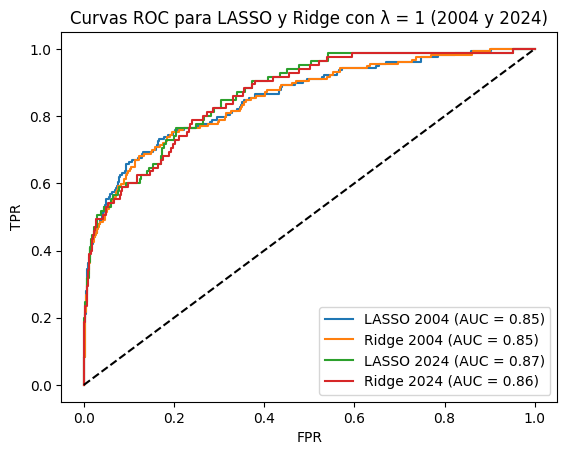

In [ ]:

#Creamos los modelos con C=1, lo que equivale a λ = 1 --> λ = 1/C
lasso_a1 = LogisticRegression(C = 1, penalty='l1', solver='liblinear', random_state=101, max_iter=10000)
ridge_a1 = LogisticRegression(C = 1, penalty='l2', solver='lbfgs', random_state=101, max_iter=10000)


#Modelos 2004
#Entrenamos los modelos con las bases de entrenamiento
ridge_2004_a1 = ridge_a1.fit(X_train_2004_transformed, y_train_2004)             
lasso_2004_a1 = lasso_a1.fit(X_train_2004_transformed, y_train_2004)           

#Hacemos las predicciones
y_pred_lasso_2004 = lasso_a1.predict(X_test_2004_transformed)
y_pred_ridge_2004 = ridge_a1.predict(X_test_2004_transformed) 


# Iteramos en cada modelo y su prediccion para calcular las metricas.
for model_name, y_pred in [("LASSO 2004", y_pred_lasso_2004), ("Ridge 2004", y_pred_ridge_2004)]:
    print("---")
    print(f"{model_name} - Accuracy:", accuracy_score(y_test_2004, y_pred))
    print(f"{model_name} - Matriz de confusión:\n", confusion_matrix(y_test_2004, y_pred))

    # Curva ROC
    y_score = lasso_2004_a1.predict_proba(X_test_2004_transformed)[:, 1] if model_name == "LASSO 2004" else ridge_2004_a1.predict_proba(X_test_2004_transformed)[:, 1]
    auc = roc_auc_score(y_test_2004, y_score)
    fpr, tpr, _ = roc_curve(y_test_2004, y_score)
    ecm = mean_squared_error(y_test_2004, y_pred)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    print(f"{model_name} - AUC:", auc)
    print(f"{model_name} - ECM:", ecm)


# Repetimos con los Modelos 2024
#Entrenamos los modelos con las bases de entrenamiento
ridge_2024_a1 = ridge_a1.fit(X_train_2024_transformed, y_train_2024)             
lasso_2024_a1 = lasso_a1.fit(X_train_2024_transformed, y_train_2024)           

#Hacemos las predicciones
y_pred_ridge_2024 = ridge_2024_a1.predict(X_test_2024_transformed)
y_pred_lasso_2024 = lasso_2024_a1.predict(X_test_2024_transformed)


for model_name, y_pred in [("LASSO 2024", y_pred_lasso_2024), ("Ridge 2024", y_pred_ridge_2024)]:
    print("---")
    print(f"{model_name} - Accuracy:", accuracy_score(y_test_2024, y_pred))
    print(f"{model_name} - Matriz de confusión:\n", confusion_matrix(y_test_2024, y_pred))
    # Curva ROC
    y_score = lasso_2024_a1.predict_proba(X_test_2024_transformed)[:, 1] if model_name == "LASSO 2024" else ridge_2024_a1.predict_proba(X_test_2024_transformed)[:, 1]
    auc = roc_auc_score(y_test_2024, y_score)
    fpr, tpr, _ = roc_curve(y_test_2024, y_score)
    ecm = mean_squared_error(y_test_2024, y_pred)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    print(f"{model_name} - AUC:", auc)
    print(f"{model_name} - ECM:", ecm)


# Gráfica ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curvas ROC para LASSO y Ridge con λ = 1 (2004 y 2024)')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()
 

#### 5) Realicen un barrido en λ = 10n con n ∈ {−5, −4, −3 ..., +4, +5} y utilice 10-fold CV para elegir el λ óptimo en regresión logística con Ridge y con LASSO. ¿Qué λ seleccionó en cada caso? Usando la librería de seabor, generen box plot mostrando la distribución del error de predicción para cada λ. Cada box debe corresponder a un valor de λ y contener como observaciones el error medio de validación (MSE) para cada partición. Además, para la regularización LASSO, generen un line plot del promedio de la proporción de variables ignoradas por el modelo en función de λ (como vieron en el tutorial 10), es decir la proporción de variables para las cuales el coeficiente asociador es cero.

In [87]:

# Definimos los valores de lambdas 
lambdas = [10**n for n in range(-5, 6)] 
kf = KFold(n_splits=10, shuffle=True, random_state=101)

# Listas para guardar los resultados
errors_lasso_2004 = []
errors_ridge_2004 = []
proportion_zero_lasso_2004 = []

errors_lasso_2024 = []
errors_ridge_2024 = []
proportion_zero_lasso_2024 = []

best_lasso_error_2004 = float('inf')
best_ridge_error_2004 = float('inf')
best_lasso_error_2024 = float('inf')
best_ridge_error_2024 = float('inf')

lasso_cv_2004 = None  # El mejor modelo Lasso para 2004
ridge_cv_2004 = None  # El mejor modelo Ridge para 2004
lasso_cv_2024 = None  # El mejor modelo Lasso para 2024
ridge_cv_2024 = None  # El mejor modelo Ridge para 2024

# Iterar sobre los valores de lambda
for lam in lambdas:
    # ---- Lasso y Ridge para la base de datos 2004 ----
    # Lasso (penalización L1)
    lasso_2004 = LogisticRegression(penalty='l1', C=1/lam, solver='liblinear', max_iter=100000)
    lasso_cv_errors_2004 = cross_val_score(lasso_2004, X_test_2004_transformed, y_test_2004, cv=kf, scoring='neg_mean_squared_error')
    mean_lasso_cv_error_2004 = -np.mean(lasso_cv_errors_2004)  # Cross_val_score devuelve el negativo del error cuadrático medio
    errors_lasso_2004.append(-lasso_cv_errors_2004)  # Guardamos el error

    # Si este es el mejor error hasta ahora, guardamos el modelo
    if mean_lasso_cv_error_2004 < best_lasso_error_2004:
        best_lasso_error_2004 = mean_lasso_cv_error_2004
        lasso_cv_2004 = lasso_2004  # Guardamos el modelo Lasso con el mejor error

    # Ridge (penalización L2)
    ridge_2004 = LogisticRegression(penalty='l2', C=1/lam, solver='lbfgs', max_iter=100000)
    ridge_cv_errors_2004 = cross_val_score(ridge_2004, X_test_2004_transformed, y_test_2004, cv=kf, scoring='neg_mean_squared_error')
    mean_ridge_cv_error_2004 = -np.mean(ridge_cv_errors_2004)  # Cross_val_score devuelve el negativo del error cuadrático medio
    errors_ridge_2004.append(-ridge_cv_errors_2004)  # Guardamos el error

    # Si este es el mejor error hasta ahora, guardamos el modelo
    if mean_ridge_cv_error_2004 < best_ridge_error_2004:
        best_ridge_error_2004 = mean_ridge_cv_error_2004
        ridge_cv_2004 = ridge_2004  # Guardamos el modelo Ridge con el mejor error

    # Calcular la proporción de variables ignoradas por LASSO en 2004
    lasso_2004.fit(X_test_2004_transformed, y_test_2004)  # Ajustamos Lasso al conjunto completo
    zero_coeffs_2004 = np.sum(lasso_2004.coef_ == 0)  # Número de coeficientes igual a 0
    proportion_zero_lasso_2004.append(zero_coeffs_2004 / len(lasso_2004.coef_))  # Proporción de coeficientes igual a 0

    # ---- Lasso y Ridge para la base de datos 2024 ----
    # Lasso (penalización L1)
    lasso_2024 = LogisticRegression(penalty='l1', C=1/lam, solver='liblinear', max_iter=100000)
    lasso_cv_errors_2024 = cross_val_score(lasso_2024, X_test_2024_transformed, y_test_2024, cv=kf, scoring='neg_mean_squared_error')
    mean_lasso_cv_error_2024 = -np.mean(lasso_cv_errors_2024)  # Cross_val_score devuelve el negativo del error cuadrático medio
    errors_lasso_2024.append(-lasso_cv_errors_2024)  # Guardamos el error

    # Si este es el mejor error hasta ahora, guardamos el modelo
    if mean_lasso_cv_error_2024 < best_lasso_error_2024:
        best_lasso_error_2024 = mean_lasso_cv_error_2024
        lasso_cv_2024 = lasso_2024  # Guardamos el modelo Lasso con el mejor error

    # Ridge (penalización L2)
    ridge_2024 = LogisticRegression(penalty='l2', C=1/lam, solver='lbfgs', max_iter=100000)
    ridge_cv_errors_2024 = cross_val_score(ridge_2024, X_test_2024_transformed, y_test_2024, cv=kf, scoring='neg_mean_squared_error')
    mean_ridge_cv_error_2024 = -np.mean(ridge_cv_errors_2024)  # Cross_val_score devuelve el negativo del error cuadrático medio
    errors_ridge_2024.append(-ridge_cv_errors_2024)  # Guardamos el error

    # Si este es el mejor error hasta ahora, guardamos el modelo
    if mean_ridge_cv_error_2024 < best_ridge_error_2024:
        best_ridge_error_2024 = mean_ridge_cv_error_2024
        ridge_cv_2024 = ridge_2024  # Guardamos el modelo Ridge con el mejor error

    # Calcular la proporción de variables ignoradas por LASSO en 2024
    lasso_2024.fit(X_test_2024_transformed, y_test_2024)  # Ajustamos Lasso al conjunto completo
    zero_coeffs_2024 = np.sum(lasso_2024.coef_ == 0)  # Número de coeficientes igual a 0
    proportion_zero_lasso_2024.append(zero_coeffs_2024 / len(lasso_2024.coef_))  # Proporción de coeficientes igual a 0

# Al final del bucle, los mejores modelos estarán guardados en `lasso_cv_2004`, `ridge_cv_2004`, `lasso_cv_2024`, y `ridge_cv_2024`
print("Mejor Lasso Model (base 2004):")
print(f"Lambda: {1/lasso_cv_2004.C}, Error: {best_lasso_error_2004}")

print("\nMejor Ridge Model (base 2004):")
print(f"Lambda: {1/ridge_cv_2004.C}, Error: {best_ridge_error_2004}")

print("\nMejor Lasso Model (base 2024):")
print(f"Lambda: {1/lasso_cv_2024.C}, Error: {best_lasso_error_2024}")

print("\nMejor Ridge Model (base 2024):")
print(f"Lambda: {1/ridge_cv_2024.C}, Error: {best_ridge_error_2024}")

Mejor Lasso Model (base 2004):
Lambda: 10.0, Error: 0.10784313725490198

Mejor Ridge Model (base 2004):
Lambda: 10.0, Error: 0.10980392156862746

Mejor Lasso Model (base 2024):
Lambda: 10.0, Error: 0.08278158295281582

Mejor Ridge Model (base 2024):
Lambda: 10.0, Error: 0.08691019786910198


In [88]:
#Predecir usando el mejor modelo Lasso 2004
mejor_lasso04 = lasso_cv_2004.fit(X_train_2004_transformed, y_train_2004)
y_pred_lasso_2004 = mejor_lasso04.predict(X_test_2004_transformed)
auc_lasso_2004 = roc_auc_score(y_test_2004, y_pred_lasso_2004)
precision_lasso_2004 = accuracy_score(y_test_2004, y_pred_lasso_2004)
ecm_l04 = mean_squared_error(y_test_2004, y_pred_lasso_2004)

# Predecir usando el mejor modelo Ridge 2004
mejor_ridge04 = ridge_cv_2004.fit(X_train_2004_transformed, y_train_2004)
y_pred_ridge_2004 = mejor_ridge04.predict(X_test_2004_transformed)
auc_ridge_2004 = roc_auc_score(y_test_2004, y_pred_ridge_2004)
precision_ridge_2004 = accuracy_score(y_test_2004, y_pred_ridge_2004)
ecm_r04 = mean_squared_error(y_test_2004, y_pred_ridge_2004)

# Predecir usando el mejor modelo Lasso 2024
mejor_lasso24 = lasso_cv_2024.fit(X_train_2024_transformed, y_train_2024)
y_pred_lasso_2024 = mejor_lasso24.predict(X_test_2024_transformed)
auc_lasso_2024 = roc_auc_score(y_test_2024, y_pred_lasso_2024)
precision_lasso_2024 = accuracy_score(y_test_2024, y_pred_lasso_2024)
ecm_l24 = mean_squared_error(y_test_2024, y_pred_lasso_2024)


# Predecir usando el mejor modelo Ridge 2024
mejor_ridge24 = ridge_cv_2024.fit(X_train_2024_transformed, y_train_2024)
y_pred_ridge_2024 = mejor_ridge24.predict(X_test_2024_transformed)
auc_ridge_2024 = roc_auc_score(y_test_2024, y_pred_ridge_2024)
precision_ridge_2024 = accuracy_score(y_test_2024, y_pred_ridge_2024)
ecm_r24 = mean_squared_error(y_test_2024, y_pred_ridge_2024)



# Mostrar los resultados
print(f"\nAUC Lasso 2004: {auc_lasso_2004}")
print(f"Precisión Lasso 2004: {precision_lasso_2004}")
print(f"Alpha: {1/mejor_lasso04.C}")
print(f"ECM: {ecm_l04}")

print(f"\nAUC Ridge 2004: {auc_ridge_2004}")
print(f"Precisión Ridge 2004: {precision_ridge_2004}")
print(f"Alpha: {1/mejor_ridge04.C}")
print(f"ECM: {ecm_r04}")

print(f"\nAUC Lasso 2024: {auc_lasso_2024}")
print(f"Precisión Lasso 2024: {precision_lasso_2024}")
print(f"Alpha: {1/mejor_lasso24.C}")
print(f"ECM: {ecm_l24}")

print(f"\nAUC Ridge 2024: {auc_ridge_2024}")
print(f"Precisión Ridge 2024: {precision_ridge_2024}")
print(f"Alpha: {1/mejor_ridge24.C}")
print(f"ECM: {ecm_r24}")


AUC Lasso 2004: 0.6864478083415134
Precisión Lasso 2004: 0.8970588235294118
Alpha: 10.0
ECM: 0.10294117647058823

AUC Ridge 2004: 0.6948431999173377
Precisión Ridge 2004: 0.8980392156862745
Alpha: 10.0
ECM: 0.10196078431372549

AUC Lasso 2024: 0.69375
Precisión Lasso 2024: 0.9186206896551724
Alpha: 10.0
ECM: 0.08137931034482758

AUC Ridge 2024: 0.6812040441176471
Precisión Ridge 2024: 0.9144827586206896
Alpha: 10.0
ECM: 0.08551724137931034


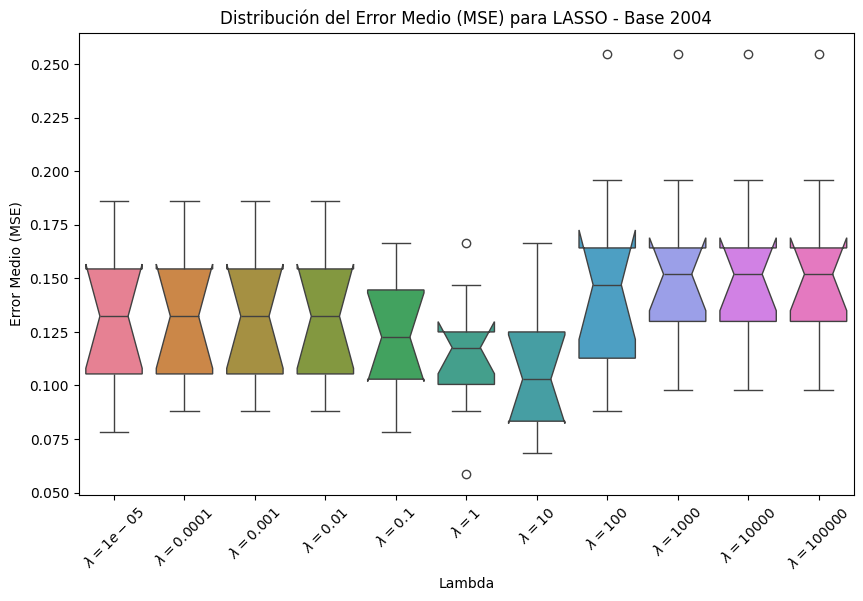

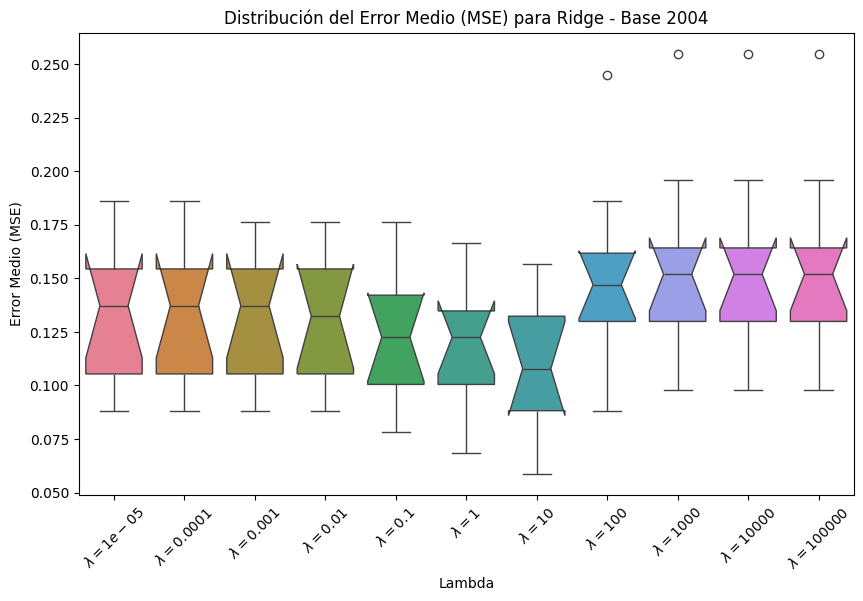

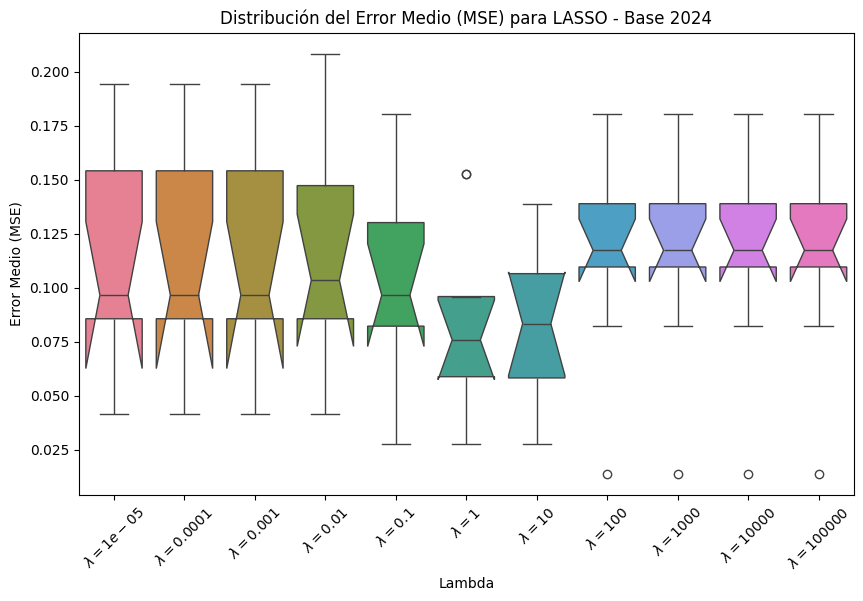

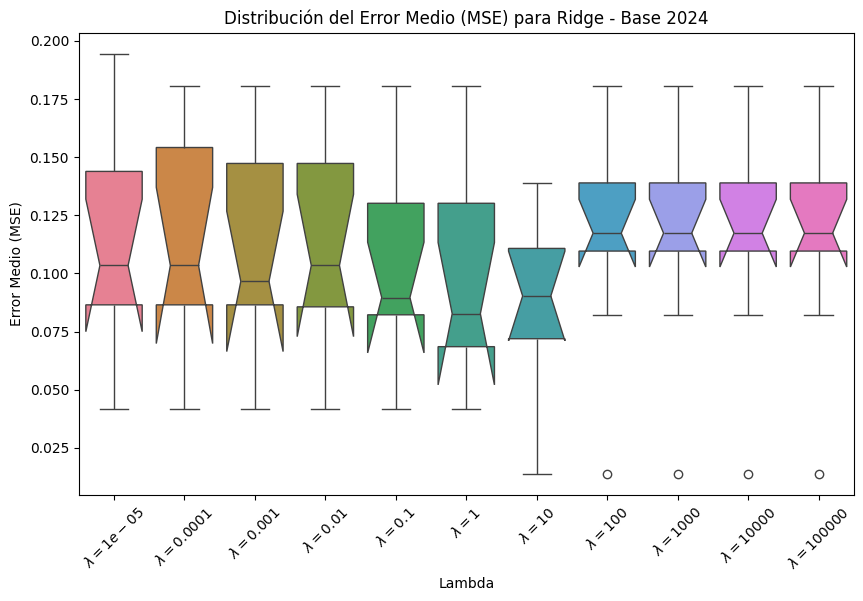

In [89]:
# Boxplot para Lasso 2004
plt.figure(figsize=(10, 6))
sns.boxplot(data=errors_lasso_2004, notch=True)
plt.xticks(range(len(lambdas)), [f"$\\lambda={lam}$" for lam in lambdas], rotation=45)
plt.xlabel('Lambda')
plt.ylabel('Error Medio (MSE)')
plt.title('Distribución del Error Medio (MSE) para LASSO - Base 2004')
plt.show()

# Boxplot para Ridge 2004
plt.figure(figsize=(10, 6))
sns.boxplot(data=errors_ridge_2004, notch=True)
plt.xticks(range(len(lambdas)), [f"$\\lambda={lam}$" for lam in lambdas], rotation=45)
plt.xlabel('Lambda')
plt.ylabel('Error Medio (MSE)')
plt.title('Distribución del Error Medio (MSE) para Ridge - Base 2004')
plt.show()

# Boxplot para Lasso 2024
plt.figure(figsize=(10, 6))
sns.boxplot(data=errors_lasso_2024, notch=True)
plt.xticks(range(len(lambdas)), [f"$\\lambda={lam}$" for lam in lambdas], rotation=45)
plt.xlabel('Lambda')
plt.ylabel('Error Medio (MSE)')
plt.title('Distribución del Error Medio (MSE) para LASSO - Base 2024')
plt.show()

# Boxplot para Ridge 2024
plt.figure(figsize=(10, 6))
sns.boxplot(data=errors_ridge_2024, notch=True)
plt.xticks(range(len(lambdas)), [f"$\\lambda={lam}$" for lam in lambdas], rotation=45)
plt.xlabel('Lambda')
plt.ylabel('Error Medio (MSE)')
plt.title('Distribución del Error Medio (MSE) para Ridge - Base 2024')
plt.show()


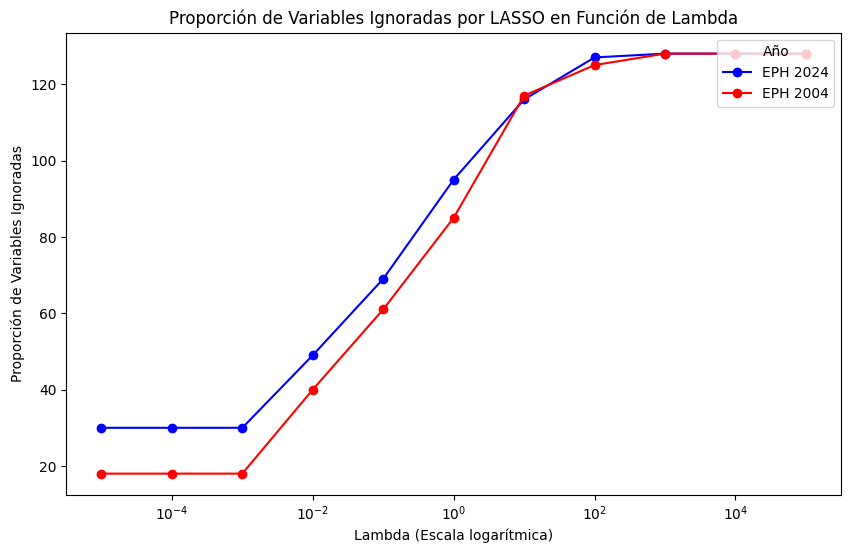

In [ ]:
# Line plot para la proporción de variables ignoradas por LASSO
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Proporción de variables ignoradas por Lasso para la base de datos 2024 (en color azul)
plt.plot(lambdas, proportion_zero_lasso_2024, marker='o', linestyle='-', color='b', label='EPH 2024')

# Proporción de variables ignoradas por Lasso para la base de datos 2004 (en color rojo)
plt.plot(lambdas, proportion_zero_lasso_2004, marker='o', linestyle='-', color='r', label='EPH 2004')

# Escala logarítmica para lambda
plt.xscale('log')

# Añadimos etiquetas y título
plt.xlabel('Lambda (Escala logarítmica)')
plt.ylabel('Proporción de Variables Ignoradas')
plt.title('Proporción de Variables Ignoradas por LASSO en Función de Lambda')

plt.legend(title="Año", loc='upper right')

# Mostrar el gráfico
plt.show()



In [ ]:
# Promedio del error MSE para cada valor de lambda (LASSO y Ridge)
mean_errors_lasso_2004 = np.mean(errors_lasso_2004, axis=1)
mean_errors_ridge_2004 = np.mean(errors_ridge_2004, axis=1)

# Seleccinamos el lambda óptimo
optimal_lambda_lasso_2004 = lambdas[np.argmin(mean_errors_lasso_2004)]  # El λ que minimiza el MSE
optimal_lambda_ridge_2004 = lambdas[np.argmin(mean_errors_ridge_2004)]  # El λ que minimiza el MSE

# Promedio del error MSE para cada valor de lambda (LASSO y Ridge)
mean_errors_lasso_2024 = np.mean(errors_lasso_2024, axis=1)
mean_errors_ridge_2024 = np.mean(errors_ridge_2024, axis=1)

# Seleccionamos el lambda óptimo
optimal_lambda_lasso_2024 = lambdas[np.argmin(mean_errors_lasso_2024)]  # El λ que minimiza el MSE
optimal_lambda_ridge_2024 = lambdas[np.argmin(mean_errors_ridge_2024)]  # El λ que minimiza el MSE

print(f"El valor óptimo de λ para LASSO 2004 es: {optimal_lambda_lasso_2004}")
print(f"El valor óptimo de λ para Ridge 2004 es: {optimal_lambda_ridge_2004}")
print(f"El valor óptimo de λ para LASSO 2024 es: {optimal_lambda_lasso_2024}")
print(f"El valor óptimo de λ para Ridge 2024 es: {optimal_lambda_ridge_2024}")

El valor óptimo de λ para LASSO 2004 es: 10
El valor óptimo de λ para Ridge 2004 es: 10
El valor óptimo de λ para LASSO 2024 es: 10
El valor óptimo de λ para Ridge 2024 es: 10


#### 6) En el caso del valor óptimo de λparaLASSO encontrado en el inciso anterior, ¿qué variables fueron descartadas? ¿Son las que hubiera  esperado? ¿Tiene relación con lo que respondieron en el inciso 1 de a Parte I?

In [93]:
# Obtener los coeficientes del modelo LASSO ajustado

feature_names = X_train_2024_transformed.columns
var_lasso_2004 = feature_names[(lasso_cv_2004.coef_ != 0).flatten()]
var_lasso_2024 = feature_names[(lasso_cv_2024.coef_ != 0).flatten()]


for modelo, año in [(lasso_cv_2004, "2004"), (lasso_cv_2024, "2024")]:
    lasso_best = modelo

# Obtener los nombres de las variables
    feature_names = X_train_2024_transformed.columns  #Tienen las mismas columnas, así que es lo mismo

# Identificar las variables ignoradas (coeficientes = 0)
    ignored_features = feature_names[(lasso_best.coef_ == 0).flatten()]

# Imprimir las variables ignoradas
    print("\n", "Modelo Lasso " + año)
    print( "\n", f"Variables ignoradas con lambda óptimo: {list(ignored_features)}")
    print(f"Número total de variables ignoradas: {len(ignored_features)}")

print("\n", f"Variables elegidas 2024: { list(var_lasso_2024)}")
print(f"Variables elegidas 2004: { list(var_lasso_2004)}")

print("\n","Variables en 2024, pero no en 2004 :", (set(var_lasso_2024) - set(var_lasso_2004)))
print("Variables en 2004, pero no en 2024 :", (set(var_lasso_2004) - set(var_lasso_2024)))



 Modelo Lasso 2004

 Variables ignoradas con lambda óptimo: ['iv2', 'ii1', 'ix_tot', 'iv1_1', 'iv1_2', 'iv1_3', 'iv1_4', 'iv1_5', 'iv1_6', 'iv3_0.0', 'iv3_2.0', 'iv3_3.0', 'iv3_4.0', 'iv4_0.0', 'iv4_1.0', 'iv4_2.0', 'iv4_3.0', 'iv4_4.0', 'iv4_5.0', 'iv4_6.0', 'iv4_7.0', 'iv4_9.0', 'iv6_0.0', 'iv6_1.0', 'iv6_2.0', 'iv6_3.0', 'iv8_0.0', 'iv8_1.0', 'iv8_2.0', 'iv11_0.0', 'iv11_1.0', 'iv11_2.0', 'iv11_3.0', 'iv11_4.0', 'iv11_9.0', 'iv12_1_0.0', 'iv12_1_1.0', 'iv12_1_2.0', 'iv12_2_0.0', 'iv12_2_1.0', 'iv12_2_2.0', 'iv12_3_0.0', 'iv12_3_1.0', 'iv12_3_2.0', 'ii4_1_0.0', 'ii4_1_1.0', 'ii4_1_2.0', 'ii7_0.0', 'ii7_1.0', 'ii7_2.0', 'ii7_3.0', 'ii7_4.0', 'ii7_5.0', 'ii7_6.0', 'ii7_7.0', 'ii7_8.0', 'ii7_9.0', 'ii8_0.0', 'ii8_1.0', 'ii8_2.0', 'ii8_3.0', 'ii8_4.0', 'ii8_5.0', 'ii9_0.0', 'ii9_1.0', 'ii9_2.0', 'ii9_3.0', 'ii9_4.0', 'v1_2', 'v1_9', 'v2_1', 'v2_2', 'v2_9', 'v3_1', 'v3_2', 'v3_9', 'v5_1', 'v5_9', 'v7_1', 'v7_2', 'v7_9', 'v12_1', 'v12_2', 'v12_9', 'v13_1', 'v13_2', 'v13_9', 'v14_1', 'v14_